# ACF (Autocorrelation Function)
*How to select q?*

- Also known as correlogram
- **A**uto = Self (both variables come from the same time series)
- **C**orrelation = scaled covariance (always between -1 and +1)

## Autocorrelation to ACF
- The  ACF is defined *as if* the time series were stationary (that is, the autocorrelation depends only on the time difference)
- We can calculate the smaple mean, covariance, correlation, etc... **over time**

## Plotting the ACF
- Plot the ACF value vs. the lag 
- NOTE: Python requires either Scipy or statsmodels to get the ACF

### Confidence intervals in ACF Plot
- If we see any lagged autocorrelations outside the confidence threshold, we will reject that they equal to 0.
- NOTE: **Frequentist interpretation** (ie: for a 95% confidence interval, this means 5% of the time values will go outside by *chance*)
    - `Do we correct for this???`

## How to determine *q* in MA(q)?
- Assign *q* to be the maximum non-zero lag 
    - zero being within the confidence interval.
- Usually the ACF for `lags < q` are also non-zero


# PACF (Partial AutoCorrelation Function)
*How to select p?*

- Similar to choosing *q* with an ACF

## How to set *p*?
- p = maximum non-zero (outisde confidence interval) lag
    - Same as ACF

## What it is
- It is the correlation that can't be explained by the in-between variables between two points in time
- Ex. You want to know if Y(1) should be used to predict Y(5)
    - same would be true for Y(2) -> Y(6), Y(3) -> Y(7), etc...
- In-between values are Y(2), Y(3), Y(4)
- If these in-between values are **not** helpful to predict Y(5), then the PACF will be large, and Y(1) should be included in the AR (model)


In [1]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import numpy as np
import matplotlib.pyplot as plt 

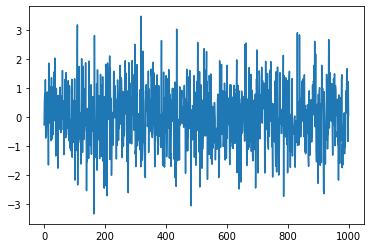

In [2]:
# Generate noise from standard normal
x0 = np.random.randn(1000)
plt.plot(x0)

Text(0.5, 1.0, 'x0 Partial Autocorrelation\nNote the few points outside of zero are too close to zero to claim non-zero.')

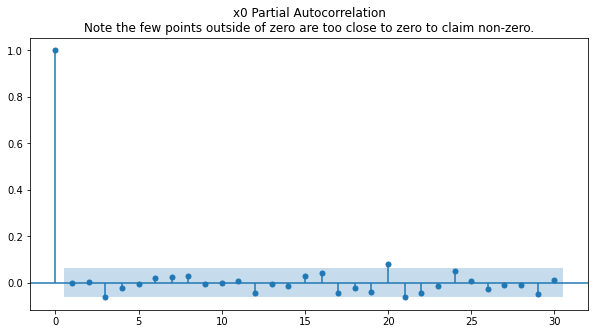

In [6]:
# Plot the PACF for the above noise

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x0, ax=ax)
plt.title("x0 Partial Autocorrelation\nNote the few points outside of zero are too close to zero to claim non-zero.")

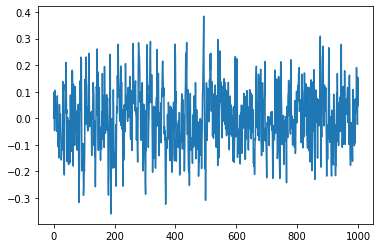

In [7]:
# Create an AR(1) process then test PACF again

x1 = [0]
for i in range(1000):
    x = 0.5 * x1[-1] + 0.1 * np.random.randn()
    x1.append(x)
x1 = np.array(x1)

plt.plot(x1)

Text(0.5, 1.0, 'x1 (AR(1)) Partial AUtocorrelation\nNote the first point is far outsize zero, this plot infers an AR of 1')

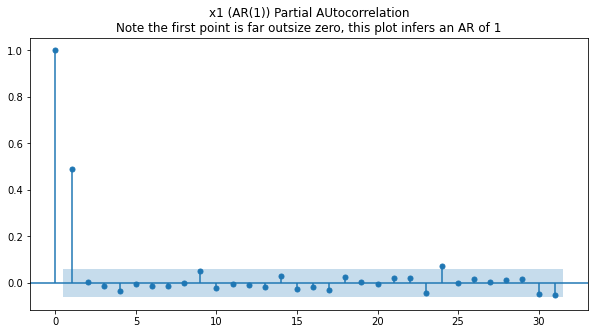

In [10]:
# Plot the PACF for x1 (AR(1))

fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x1, ax=ax)
plt.title("x1 (AR(1)) Partial AUtocorrelation\nNote the first point is far outsize zero, this plot infers an AR of 1")

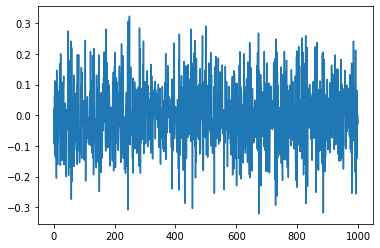

In [11]:
# Another AR(1) test but with -0.5 coefficiant instead of (positive) 0.5

x1 = [0]
for i in range(1000):
    x = -0.5 * x1[-1] + 0.1 * np.random.randn()
    x1.append(x)
x1 = np.array(x1)

plt.plot(x1)

Text(0.5, 1.0, 'x1 (AR(1)) Partial AUtocorrelation with -0.5 coefficiant\nNote the first point is far outsize zero but in the negative direction. This plot still infers a AR of 1')

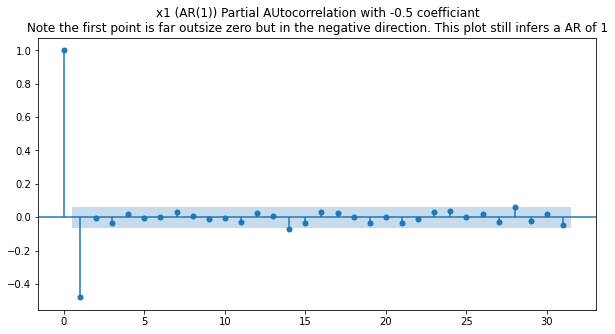

In [13]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x1, ax=ax)
plt.title("x1 (AR(1)) Partial AUtocorrelation with -0.5 coefficiant\nNote the first point is far outsize zero but in the negative direction. This plot still infers a AR of 1")

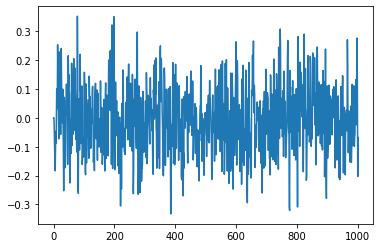

In [14]:
# Generate an AR(2) process (time series depends on TWO past values instead of only 1)

x2 = [0, 0]
for i in range(1000):
    x = 0.5 * x2[-1] - 0.3 * x2[-2] + 0.1 * np.random.randn()
    x2.append(x)
x2 = np.array(x2)

plt.plot(x2)

Text(0.5, 1.0, 'x2 (AR(2)) Partial AUtocorrelation\nNote the TWO points falling far outside the zero margin.')

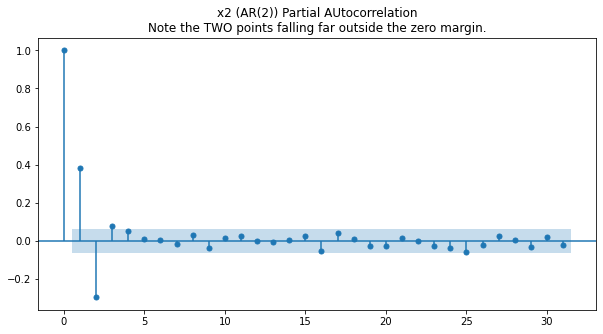

In [15]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x2, ax=ax)
plt.title("x2 (AR(2)) Partial AUtocorrelation\nNote the TWO points falling far outside the zero margin.")

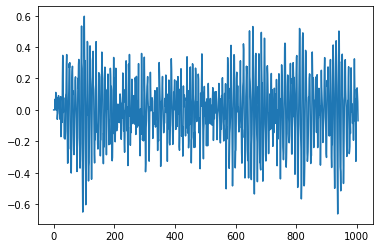

In [16]:
# Generate an AR(5) process with x depending on 3 lagged values (instead of 5)

x5 = [0, 0, 0, 0, 0]
for i in range(1000):
    x = 0.5 * x5[-1] - 0.3 * x5[-2] - 0.6 * x5[-5] + 0.1 * np.random.randn()
    x5.append(x)
x5 = np.array(x5)

plt.plot(x5)

Text(0.5, 1.0, 'x5 (AR(5)) Partial AUtocorrelation\nNote that even though we depend on 3 of the 5 values, the PACF remains at 5')

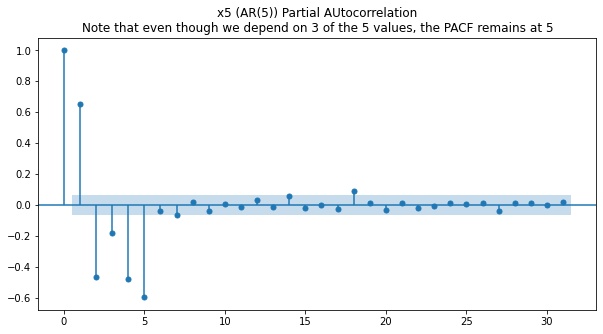

In [18]:
fig, ax = plt.subplots(figsize=(10,5))
plot_pacf(x5, ax=ax)
plt.title("x5 (AR(5)) Partial AUtocorrelation\nNote that even though we depend on 3 of the 5 values, the PACF remains at 5")

Switching to ACF and Moving Averages

Text(0.5, 1.0, 'Autocorrelation\nNote the iid is random and therefore the Autocorrelation is 1 at Lag 0')

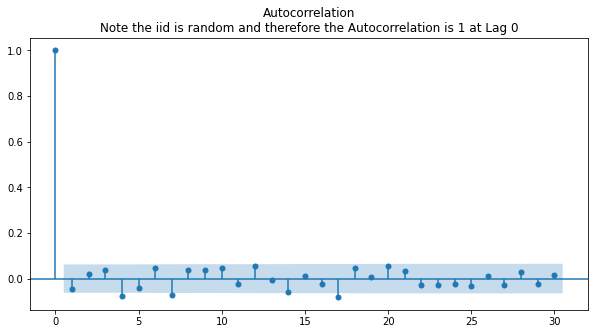

In [24]:
# iid noise

fig, ax = plt.subplots(figsize=(10,5))
plot_acf(np.random.randn(1000), ax=ax)
plt.title("Autocorrelation\nNote the iid is random and therefore the Autocorrelation is 1 at Lag 0")

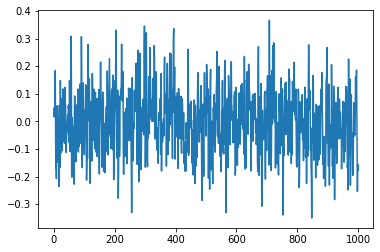

In [25]:
# Generate an MA(1) process (current_error * coefficiant + previous_errors)

errors = 0.1 * np.random.randn(1000)
ma1 = []
for i in range(1000):
    if i >= 1:
        x = 0.5 * errors[i-1] + errors[i]
    else:   # i=0
        x = errors[i]
    ma1.append(x)
ma1 = np.array(ma1)

plt.plot(ma1)

Text(0.5, 1.0, 'MA(1) Autocorrelation\nNote the first non-zero value, infers q=1')

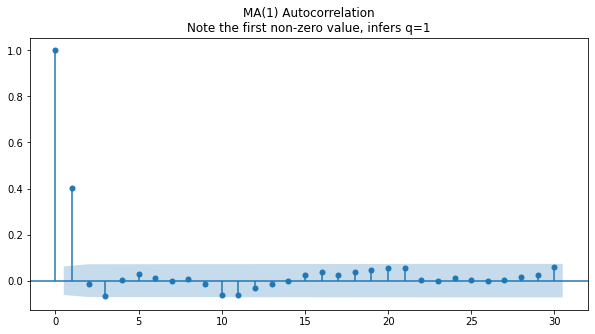

In [27]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma1, ax=ax)
plt.title("MA(1) Autocorrelation\nNote the first non-zero value, infers q=1")

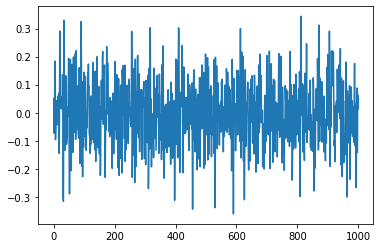

In [28]:
# Generating an MA(2) (2 coefficiants) process

errors = 0.1 * np.random.randn(1000)
ma2 = []
for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + errors[i]
    ma2.append(x)
ma2 = np.array(ma2)

plt.plot(ma2)

Text(0.5, 1.0, 'MA(2) Autocorrelation\nNote the TWO non-zero values, infers q=2')

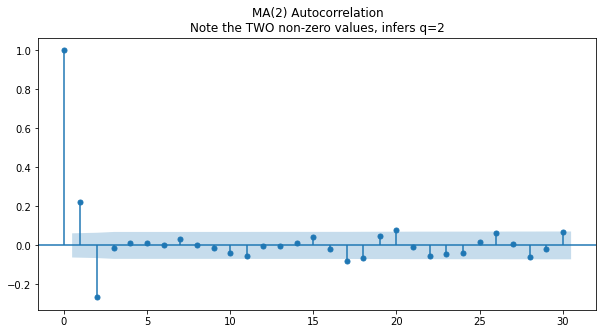

In [30]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma2, ax=ax)
plt.title("MA(2) Autocorrelation\nNote the TWO non-zero values, infers q=2")

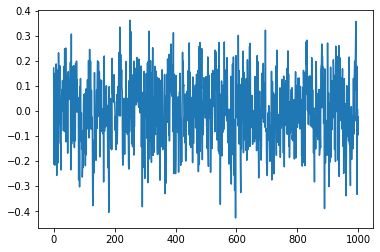

In [31]:
# Generating an MA(3) (3 coefficiants) process

errors = 0.1 * np.random.randn(1000)
ma3 = []
for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + errors[i]
    ma3.append(x)
ma3 = np.array(ma3)

plt.plot(ma3)

Text(0.5, 1.0, 'MA(3) Autocorrelation\nNote the THIRD value is non-zero, infers q=3')

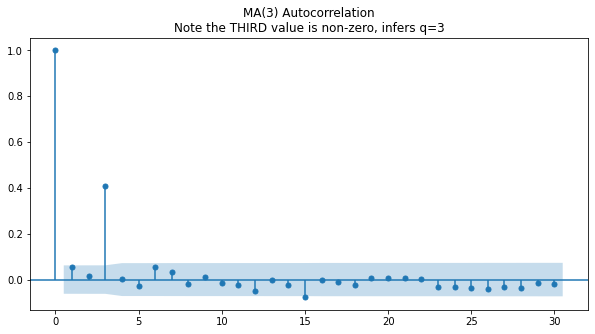

In [33]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma3, ax=ax)
plt.title("MA(3) Autocorrelation\nNote the THIRD value is non-zero, infers q=3")

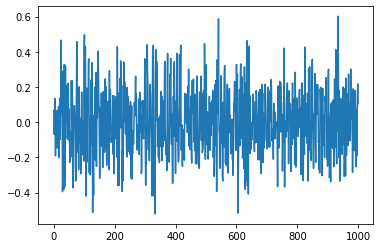

In [36]:
# Generating an MA(6) process

errors = 0.1 * np.random.randn(1000)
ma6 = []
for i in range(1000):
    x = 0.5 * errors[i-1] - 0.3 * errors[i-2] + 0.7 * errors[i-3] + \
        0.2 * errors[i-4] - 0.8 * errors[i-5] - 0.9 * errors[i-6] + errors[i]
    ma6.append(x)
ma6 = np.array(ma6)

plt.plot(ma6)

Text(0.5, 1.0, 'MA(6) Autocorrelation\nNote the SIXTH value is non-zero, infers q=6')

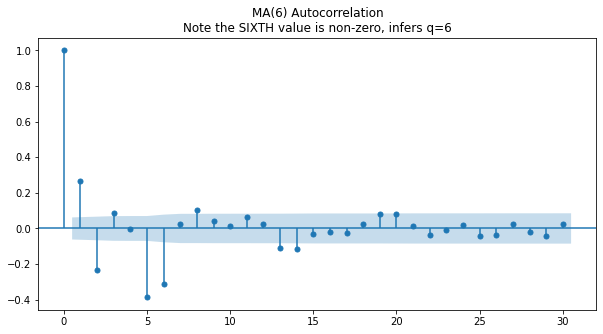

In [38]:
fig, ax = plt.subplots(figsize=(10, 5))
plot_acf(ma6, ax=ax)
plt.title("MA(6) Autocorrelation\nNote the SIXTH value is non-zero, infers q=6")